<a href="https://colab.research.google.com/github/ELAleman503/Programacion_3/blob/main/Actividad_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD SEMANA 11

In [ ]:
#Importar las librerias 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math 
import tensorflow_datasets as tfds 

In [ ]:
#cargamos nuestro dataset en variables
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteW7AI6K/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteW7AI6K/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>


In [ ]:
numeros_letras = ["Camiseta/top", "Pantalon", "	Jersey", "Vestido", "Abrigo", "Sandalia", "Camisa", "	Zapatillas de deporte", "Bolsa", "Botin"]

In [ ]:
#pasar en variables los datos de entrenamiento 
numeros_ejemplos_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplos_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [ ]:
#funcion normalizadora de los pixeles de 0 a 255 a 0 - 1
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels 

In [ ]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [ ]:
#estructuramos nuestra red neuronal 
modelo = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entrada de 28*28 = 784 neuronas una para cada pixel
                              tf.keras.layers.Dense(64, activation=tf.nn.relu),#capa oculta con 64 neuronas funcion de activacion relu
                              tf.keras.layers.Dense(64, activation=tf.nn.relu),#capa oculta con 64 neuronas, funcion de activacion relu 
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 neuronas una para cada numero,
        #funcion de activacion softmax. esta funcion es requerida para clasificacion 
])

In [ ]:
#compilamos el modelo de red neuronal e indicamos las funciones a utilizar 
modelo.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

In [ ]:
#entrenamiento por lotes
batchsize= 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplos_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [ ]:
#entrenando nuestro modelo de datos 
modelo.fit(datos_entrenamiento, epochs= 5,
           steps_per_epoch=math.ceil(numeros_ejemplos_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 13s 3ms/step - loss: 0.5045 - accuracy: 0.8216
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3763 - accuracy: 0.8625
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3424 - accuracy: 0.8744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3199 - accuracy: 0.8824
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3023 - accuracy: 0.8885


In [ ]:
#Evaluar el modelo con los datos de prueba 
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultado de las pruebas", test_loss, test_accuracy)

313/313 [==============================] - 2s 3ms/step - loss: 0.3719 - accuracy: 0.8620
Resultado de las pruebas 0.3719082772731781 0.8620207905769348


In [ ]:
#graficar la salida para evaluar los resultados 
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if(predicted_label==true_labels):
    color = "blue"
  else:
    color = "red"
    plt.xlabel("prediccion: {}".format(numeros_letras[predicted_label]), color=color)

In [ ]:
#convertimos los tensores en matrices numpy
for imagen_prueba, etiqueta_prueba in datos_prueba.take(1):
  imagen_prueba = imagen_prueba.numpy()
  etiqueta_prueba = etiqueta_prueba.numpy()
  predicciones = modelo.predict(imagen_prueba)

8


Text(0.5, 0, 'Prediccion: Bolsa')

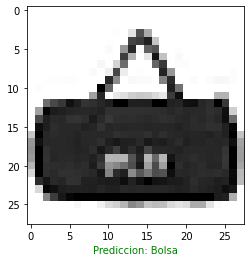

In [ ]:
i=0
for miImagen, etiqueta in datos_entrenamiento.take(1):
  etiqueta = etiqueta.numpy()
  imagen = miImagen[0].numpy().reshape(1,28,28,1)
  prediccion = modelo.predict(imagen, batch_size= 1)

valor_prediccion = np.argmax(prediccion)
print(valor_prediccion) #etiqueta[i] )

img=imagen
plt.grid(False)
plt.imshow(img[0,...,0], cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")

In [ ]:
#Graficamos los valores de la matriz para las imagenes y otra para las graficas de barras segun el acierto 
def graficar_valores_matriz(i, matriz_prediccion, etiqueta_verdadera):
  matriz_prediccion, etiqueta_verdadera = matriz_prediccion[i], etiqueta_verdadera[i]
  plt.grid(False)
  #plt.xticks([])
  #plt.yticks([])
  thisplot = plt.bar(range(10), matriz_prediccion, color="#888888")
  plt.ylim([0,1])
  etiqueta_prediccion = np.argmax(matriz_prediccion)

  thisplot[etiqueta_prediccion].set_color("red")
  thisplot[etiqueta_verdadera].set_color("green")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


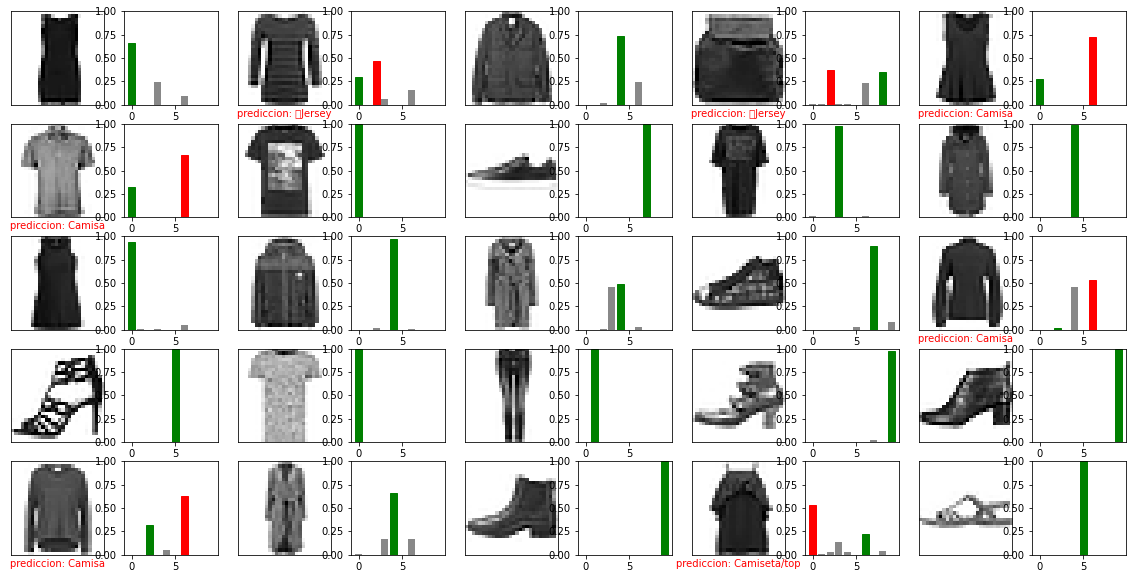

In [ ]:
numfilas = 5
numcols = 5
numimgs = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimgs):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_imagen(i, predicciones, etiqueta_prueba, imagen_prueba)

  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matriz(i, predicciones, etiqueta_prueba)

plt.show()

4


Text(0.5, 0, 'Prediccion: Abrigo')

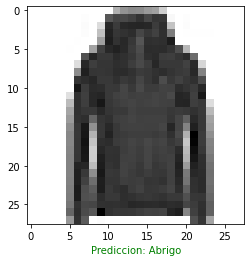

In [ ]:
#from google.colab import files
#uploaded = files.upload()
import cv2
datos = cv2.imread("/content/abrigo.png",cv2.IMREAD_GRAYSCALE)
datos = cv2.resize(datos,(28,28))
i=0

valor_prediccion = np.argmax(y_pred)
print(valor_prediccion)

y_pred = modelo.predict(datos.reshape(1,28,28,1))
plt.grid(False)
plt.imshow(datos,cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(numeros_letras[valor_prediccion]), color="green")
